## 說明
- 將大語言模型的應用視為 1 個 Chain
- 至少需要結合提示詞(prompt)與 1 個大語言模型，過程很像是把提示詞丟給大語言模型處理
- prompt | llm: 這個組合方式稱為 [LCEL, LangChain Expression Language](https://python.langchain.com/docs/expression_language/get_started)
- reference: 
    - [LangChain v0.3](https://python.langchain.ac.cn/docs/versions/v0_3/)
    - [Document loaders](https://python.langchain.com/docs/integrations/document_loaders/)
    - [LangChain 教學](https://myapollo.com.tw/series/langchain/)
    - [LangChain 怎麼玩？入門教學篇](https://myapollo.com.tw/blog/langchain-tutorial-get-started/)
    - [Ollama 教學](https://medium.com/@NeroHin/ollama-%E5%9C%A8%E6%9C%AC%E6%A9%9F%E7%92%B0%E5%A2%83%E8%BC%95%E9%AC%86%E5%9F%B7%E8%A1%8C-llm-%E5%8F%8A%E5%85%B6%E5%BB%B6%E4%BC%B8%E6%87%89%E7%94%A8-%E8%87%AA%E8%A8%82-taide-lx-7b-chat-%E6%A8%A1%E5%9E%8B-open-webui-%E5%8F%8A-code-copilot-ba11e4a1e627)
    - [RAG](https://ollama.com/blog/embedding-models)


## 目錄
- [Loader](#Loader)
    - [WebBaseLoader](#WebBaseLoader)
    - [TextLoader](#TextLoader)
    - [PyPDFLoader](#PyPDFLoader)
    - [CSVLoader](#CSVLoader)
    - [Image captions](#Image-captions)
- [Example](#Example)
    - [Chain小試牛刀](#Chain小試牛刀)
    - [Stream](#Stream)
- [Token](#Token)
- [Providers](#Providers)
    - [OpenAI](#OpenAI)
    - [Hugging Face](#Hugging-Face)
    - [Google](#Google)
    - [Ollama](#Ollama)
- [RAG](#RAG)
    

## Loader

### Web

#### [WebBaseLoader](https://python.langchain.com/docs/integrations/document_loaders/web_base/)
- WebBaseLoader does not require any credentials.

In [1]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://myapollo.com.tw/blog/langchain-document-loaders-text-splitters/")
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

USER_AGENT environment variable not set, consider setting it to identify your requests.


id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'source': 'https://myapollo.com.tw/blog/langchain-document-loaders-text-splitters/', 'title': 'LangChain 怎麼玩？用 Document Loaders / Text Splitter 處理多種類型的資料 - MyApollo', 'description': '有一些 LLM 應用有提供上傳檔案並為使用者產生摘要、查詢答案的功能，譬如 ChatGPT Plus 與 ChatGPT Enterprise 可以上傳 PDF, CSV 檔等，除了能產生摘要、擷取重點資料之外，還可以進行一些數據分析，相當強大。\n要做到這些強大的功能之前，有個前置作業是我們需要知道怎麼載入不同類型的資料，以及怎麼處理這些資料，而這些處理程序在 LangChain 的框架下，也有相對應的函式庫可以使用，並不需要從零開始打造。\n本文將教導如何使用 LangChain 處理多種類型的資料。\n', 'language': 'zh-tw'}, page_content='LangChain 怎麼玩？用 Document Loaders / Text Splitter 處理多種類型的資料 - MyApollo\nMyApollo\nMyApollo文章分類系列教學\nGoogle 試算表Git 版本控制教學LangChain 教學零經驗也可的 PySpark 教學其他系列60 秒新知書籍推薦產品\nNimoTabPomodoRollFacebookGitHubThreads\nLangChain 怎麼玩？用 Document Loaders / Text Splitter 處理多種類型的資料Posted\xa0on\xa0\nMar 7, 2024\n\xa0in\xa0\nLangChain\n, Python 程式設計 - 高階\n\xa0by\xa0\nAmo Chen\n\xa0‐\xa06\xa0min read\xa0覺得我們的內容實用嗎？ MyA

In [2]:
from langchain_community.document_loaders import WebBaseLoader

loader_multiple_pages = WebBaseLoader(
    ["https://www.example.com/", "https://google.com"]
)
documents = loader_multiple_pages.load()
print(documents, flush=True)

[Document(metadata={'source': 'https://www.example.com/', 'title': 'Example Domain', 'language': 'No language found.'}, page_content='\n\n\nExample Domain\n\n\n\n\n\n\n\nExample Domain\nThis domain is for use in illustrative examples in documents. You may use this\n    domain in literature without prior coordination or asking for permission.\nMore information...\n\n\n\n'), Document(metadata={'source': 'https://google.com', 'title': 'Google', 'language': 'zh-TW'}, page_content='Google搜尋 圖片 地圖 Play YouTube 新聞 Gmail 雲端硬碟 更多 »網頁記錄 | 設定 | 登入\xa0進階搜尋Google 的其他語言版本：  English 廣告商業解決方案關於 GoogleGoogle.com.tw© 2025 - 隱私權 - 服務條款 ')]


#### [Recursive URL](https://python.langchain.com/docs/integrations/document_loaders/recursive_url/)

In [3]:
from langchain_community.document_loaders import RecursiveUrlLoader

loader = RecursiveUrlLoader(
    "https://docs.python.org/3.9/",
    max_depth=2,
    # use_async=False,
    # extractor=None,
    # metadata_extractor=None,
    # exclude_dirs=(),
    # timeout=10,
    # check_response_status=True,
    # continue_on_failure=True,
    # prevent_outside=True,
    # base_url=None,
    # ...
)
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
documents

d:\Program\miniforge3\envs\llm_dev_python311\Lib\site-packages\langchain_community\document_loaders\recursive_url_loader.py:43: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(raw_html, "html.parser")


id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>


[Document(metadata={'source': 'https://docs.python.org/3.9/', 'content_type': 'text/html', 'title': '3.9.22 Documentation', 'language': None}, page_content='\n<!DOCTYPE html>\n\n<html xmlns="http://www.w3.org/1999/xhtml">\n  <head>\n    <meta charset="utf-8" /><title>3.9.22 Documentation</title><meta name="viewport" content="width=device-width, initial-scale=1.0">\n    \n    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />\n    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />\n    \n    <script id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>\n    <script src="_static/jquery.js"></script>\n    <script src="_static/underscore.js"></script>\n    <script src="_static/doctools.js"></script>\n    <script src="_static/language_data.js"></script>\n    \n    <script src="_static/sidebar.js"></script>\n    \n    <link rel="search" type="application/opensearchdescription+xml"\n          title="Search within

#### [Sitemap](https://python.langchain.com/docs/integrations/document_loaders/sitemap/)

In [4]:
from langchain_community.document_loaders.sitemap import SitemapLoader

sitemap_loader = SitemapLoader(web_path="https://api.python.langchain.com/sitemap.xml")
documents = loader.load()
documents

[Document(metadata={'source': 'https://docs.python.org/3.9/', 'content_type': 'text/html', 'title': '3.9.22 Documentation', 'language': None}, page_content='\n<!DOCTYPE html>\n\n<html xmlns="http://www.w3.org/1999/xhtml">\n  <head>\n    <meta charset="utf-8" /><title>3.9.22 Documentation</title><meta name="viewport" content="width=device-width, initial-scale=1.0">\n    \n    <link rel="stylesheet" href="_static/pydoctheme.css" type="text/css" />\n    <link rel="stylesheet" href="_static/pygments.css" type="text/css" />\n    \n    <script id="documentation_options" data-url_root="./" src="_static/documentation_options.js"></script>\n    <script src="_static/jquery.js"></script>\n    <script src="_static/underscore.js"></script>\n    <script src="_static/doctools.js"></script>\n    <script src="_static/language_data.js"></script>\n    \n    <script src="_static/sidebar.js"></script>\n    \n    <link rel="search" type="application/opensearchdescription+xml"\n          title="Search within

### TextLoader

In [5]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("./data/paper_sam2.txt")
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'source': './data/paper_sam2.txt'}, page_content='Segment Anything (SA) introduced a foundation model for promptable segmentation in images (Kirillov et al.,\n2023). However an image is only a static snapshot of the real world in which visual segments can exhibit\ncomplex motion, and with the rapid growth of multimedia content, a significant portion is now recorded\nwith a temporal dimension, particularly in video data. Many important applications in AR/VR, robotics,\nautonomous vehicles, and video editing require temporal localization beyond image-level segmentation. We\nbelieve a universal visual segmentation system should be applicable to both images and videos.\nSegmentation in video aims to determine the spatio-temporal extent of entities, which presents unique\nchallenges beyond those in images. Entities can undergo significant changes in appearance due to motio

### PDF
- [PyPDFLoader](https://python.langchain.com/docs/integrations/document_loaders/pypdfloader/)
- [PyMuPDFLoader](https://python.langchain.com/docs/integrations/document_loaders/pymupdf/)
- [PDFPlumber](https://python.langchain.com/docs/integrations/document_loaders/pdfplumber/)

In [6]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("./data/2304.02643v1.pdf")
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-04-06T00:32:45+00:00', 'author': '', 'keywords': '', 'moddate': '2023-04-06T00:32:45+00:00', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'subject': '', 'title': '', 'trapped': '/False', 'source': './data/2304.02643v1.pdf', 'total_pages': 30, 'page': 0, 'page_label': '1'}, page_content='Segment Anything\nAlexander Kirillov1,2,4 Eric Mintun2 Nikhila Ravi1,2 Hanzi Mao2 Chloe Rolland3 Laura Gustafson3\nTete Xiao3 Spencer Whitehead Alexander C. Berg Wan-Yen Lo Piotr Doll ´ar4 Ross Girshick4\n1project lead 2joint ﬁrst author 3equal contribution 4directional lead\nMeta AI Research, FAIR\n(b) Model: Segment Anything Model (SAM)promptimage\nvalid mask\nimage encoderprompt encoder\nlightweight mask decoder\n(a) Task: promptable se

In [7]:
from langchain_community.document_loaders import PDFPlumberLoader

loader = PDFPlumberLoader("./data/2304.02643v1.pdf")
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, defaulting to MediaBox
CropBox missing from /Page, def

id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'source': './data/2304.02643v1.pdf', 'file_path': './data/2304.02643v1.pdf', 'page': 0, 'total_pages': 30, 'Author': '', 'CreationDate': 'D:20230406003245Z', 'Creator': 'LaTeX with hyperref', 'Keywords': '', 'ModDate': 'D:20230406003245Z', 'PTEX.Fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'Producer': 'pdfTeX-1.40.21', 'Subject': '', 'Title': '', 'Trapped': 'False'}, page_content='Segment Anything\nAlexanderKirillov1,2,4 EricMintun2 NikhilaRavi1,2 HanziMao2 ChloeRolland3 LauraGustafson3\nTeteXiao3 SpencerWhitehead AlexanderC.Berg Wan-YenLo PiotrDolla´r4 RossGirshick4\n1projectlead 2jointfirstauthor 3equalcontribution 4directionallead\nMetaAIResearch,FAIR\nvalid mask valid mask annotate\nlightweight mask decoder model data\ntrain\nmodel\nimage Segment Anything 1B (SA-1B): encoder\n•1+ billion masks\nprompt\ncat w

#### [PyMuPDF4LLMLoader](https://python.langchain.com/docs/integrations/document_loaders/pymupdf4llm/)

In [10]:
from langchain_pymupdf4llm import PyMuPDF4LLMLoader

file_path = "./data/2304.02643v1.pdf"
loader = PyMuPDF4LLMLoader(file_path)
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'producer': 'pdfTeX-1.40.21', 'creator': 'LaTeX with hyperref', 'creationdate': '2023-04-06T00:32:45+00:00', 'source': './data/2304.02643v1.pdf', 'file_path': './data/2304.02643v1.pdf', 'total_pages': 30, 'format': 'PDF 1.5', 'title': '', 'author': '', 'subject': '', 'keywords': '', 'moddate': '2023-04-06T00:32:45+00:00', 'trapped': '', 'modDate': 'D:20230406003245Z', 'creationDate': 'D:20230406003245Z', 'page': 0}, page_content='## **Segment Anything**\n\nAlexander Kirillov [1] *[,]* [2] *[,]* [4] Eric Mintun [2] Nikhila Ravi [1] *[,]* [2] Hanzi Mao [2] Chloe Rolland [3] Laura Gustafson [3]\n\nTete Xiao [3] Spencer Whitehead Alexander C. Berg Wan-Yen Lo Piotr Doll´ar [4] Ross Girshick [4]\n\n1 project lead 2 joint first author 3 equal contribution 4 directional lead\n### Meta AI Research, FAIR\n\n\nvalid mask\n\n\nvalid mask\n\n\n\n\n|cat with black ears|Col2|\n|---|

In [11]:
print(documents[7].page_content)

mIoU at

1 p oint 3 p oints

*perceived gender presentation*

feminine 54.4 *±* 1.7 90.4 *±* 0.6

masculine 55.7 *±* 1.7 90.1 *±* 0.6

*perceived age group*

older 62.9 *±* 6.7 92.6 *±* 1.3

middle 54.5 *±* 1.3 90.2 *±* 0.5

young 54.2 *±* 2.2 91.2 *±* 0.7


mIoU at

1 p oint 3 p oints

*perceived skin tone*

1 52.9 *±* 2.2 91.0 *±* 0.9

2 51.5 *±* 1.4 91.1 *±* 0.5

3 52.2 *±* 1.9 91.4 *±* 0.7

4 51.5 *±* 2.7 91.7 *±* 1.0

5 52.4 *±* 4.2 92.5 *±* 1.4

6 56.7 *±* 6.3 91.2 *±* 2.4


Table 2: SAM’s performance segmenting people across perceived gender presentation, age group, and skin tone. 95%
confidence intervals are shown. Within each grouping, all
confidence intervals overlap except older *vs* . middle.

**Fairness in segmenting people.** We investigate potential
fairness concerns across perceived gender presentation, perceived age group, and perceived skin tone by measuring
the performance discrepancy of SAM between groups. We
use the More Inclusive Annotations for People (MIAP) [87]

### [CSVLoader](https://python.langchain.com/docs/integrations/document_loaders/csv/)

In [12]:
from langchain_community.document_loaders.csv_loader import CSVLoader

loader = CSVLoader(file_path='./data/organizations-100.csv')
documents = loader.load()
print("id: ", type(documents[0].id), flush=True)
print("metadata: ", type(documents[0].metadata), flush=True)
print("page_content: ", type(documents[0].page_content), flush=True)
print("type: ", type(documents[0].type), flush=True)
print(documents, flush=True)

id:  <class 'NoneType'>
metadata:  <class 'dict'>
page_content:  <class 'str'>
type:  <class 'str'>
[Document(metadata={'source': './data/organizations-100.csv', 'row': 0}, page_content='Index: 1\nOrganization Id: FAB0d41d5b5d22c\nName: Ferrell LLC\nWebsite: https://price.net/\nCountry: Papua New Guinea\nDescription: Horizontal empowering knowledgebase\nFounded: 1990\nIndustry: Plastics\nNumber of employees: 3498'), Document(metadata={'source': './data/organizations-100.csv', 'row': 1}, page_content='Index: 2\nOrganization Id: 6A7EdDEA9FaDC52\nName: Mckinney, Riley and Day\nWebsite: http://www.hall-buchanan.info/\nCountry: Finland\nDescription: User-centric system-worthy leverage\nFounded: 2015\nIndustry: Glass / Ceramics / Concrete\nNumber of employees: 4952'), Document(metadata={'source': './data/organizations-100.csv', 'row': 2}, page_content='Index: 3\nOrganization Id: 0bFED1ADAE4bcC1\nName: Hester Ltd\nWebsite: http://sullivan-reed.com/\nCountry: China\nDescription: Switchable sca

### [Image captions](https://python.langchain.com/docs/integrations/document_loaders/image_captions/)
- By default, the loader utilizes the pre-trained [Salesforce BLIP](https://huggingface.co/Salesforce/blip-image-captioning-base) image captioning model.

In [13]:
from langchain_community.document_loaders import ImageCaptionLoader

list_image_urls = [
    './data/car.jpg'
]

loader = ImageCaptionLoader(images=list_image_urls)
list_docs = loader.load()
list_docs

d:\Program\miniforge3\envs\llm_dev_python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


[Document(metadata={'image_path': './data/car.jpg'}, page_content='an image of a vintage car parked on the street [SEP]')]

### Providers

#### [OpenAI](https://python.langchain.com/docs/integrations/providers/openai/)

In [30]:
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI # Chat model
from langchain_core.prompts import PromptTemplate

load_dotenv()

llm = ChatOpenAI(
    model_name="gpt-4o",
)

prompt = PromptTemplate.from_template("How to say {input} in {output_language}:\n")

chain = prompt | llm
result = chain.invoke(
    {
        "output_language": "German",
        "input": "I love programming.",
    }
)
print(result)

content='To say "I love programming" in German, you would say "Ich liebe das Programmieren."' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 17, 'total_tokens': 38, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_90122d973c', 'finish_reason': 'stop', 'logprobs': None} id='run-57e00ce7-f9ef-439d-bead-ea5fa5a6d5b6-0' usage_metadata={'input_tokens': 17, 'output_tokens': 21, 'total_tokens': 38, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [21]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-3-large"
)

input_text = "The meaning of life is 42"
vector = embeddings.embed_query("hello")
print(vector[:3])

vectors = embeddings.embed_documents(["hello", "goodbye"])
# Showing only the first 3 coordinates
print(len(vectors))
print(vectors[0][:3])
print(vectors[1][:3])

[-0.024605071172118187, -0.0075481850653886795, 0.004001544788479805]
2
[-0.024605071172118187, -0.0075481850653886795, 0.004001544788479805]
[-0.04534505307674408, -0.019596604630351067, 0.004198386333882809]


#### [Hugging Face](https://python.langchain.com/docs/integrations/providers/huggingface/)

In [27]:
from langchain_core.prompts import PromptTemplate
from langchain_huggingface.llms import HuggingFacePipeline

prompt = PromptTemplate.from_template("How to say {input} in {output_language}:\n")

llm = HuggingFacePipeline.from_model_id(
    model_id="gpt2",
    task="text-generation",
    # device=0,  # replace with device_map="auto" to use the accelerate library.
    pipeline_kwargs={"max_new_tokens": 1000},
)

# chain = prompt | llm
chain = prompt | llm.bind(skip_prompt=True)
result = chain.invoke(
    {
        "output_language": "German",
        "input": "I love programming.",
    }
)
print(result)

Device set to use cpu



In Germany, I would rather say that.


Here is the original "Informal Languages of the American School of Management" web-page. It is here that I found some information about programming languages, also known as "English", and in that article you can find what would make an effective teacher, "Informalist", a programmatic approach to a problem solving problem.


Let me go over some of the concepts behind Informal Languages in English. The difference is that in this article, in English it means "The Language of the Presentation," since the concepts are simply not common. The more the language is understood how it explains itself in its own language language and there is no particular difference from English. In English, it is very likely to introduce you to an answer, a way of relating to other words, a rule, a list of words, etc. When in English, it is like the other way around, in that there is no special language and it is much easier to read in your normal English. In English, even

In [29]:
question = {
        "output_language": "German",
        "input": "I love programming.",
}

for chunk in chain.stream(question):
    print(chunk, end="", flush=True)


The great thing about programming is that you can choose your programming and I'm quite confident about that. I think many people are really good at it. As an example you can do a number of things, like build a data structure, get the input from the database, etc. but you can choose not to do those things. It's not possible to do everything that goes well in one day. You have to find it out, do it, learn, figure it out.

In [37]:
from langchain_huggingface.embeddings import HuggingFaceEmbeddings

model_name="sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
embeddings = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

text = "This is a test document."

query_result = embeddings.embed_query(text)

query_result[:3]

[-0.04895178973674774, -0.03986204415559769, -0.02156280353665352]

In [35]:
from langchain_community.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-large-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True}
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

text = "This is a test document."

query_result = embeddings.embed_query(text)

query_result[:3]

C:\Users\User\AppData\Local\Temp\ipykernel_46108\1061452811.py:6: LangChainDeprecationWarning: The class `HuggingFaceBgeEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceBgeEmbeddings(
d:\Program\miniforge3\envs\llm_dev_python311\Lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub\models--BAAI--bge-large-en-v1.5. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environme

[0.027746962383389473, -0.01527478639036417, 0.03462878242135048]

#### [Google](https://python.langchain.com/docs/integrations/providers/google/)

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro")
llm.invoke("Sing a ballad of LangChain.")

#### [Ollama](https://python.langchain.com/docs/integrations/providers/ollama/#llm)

In [45]:
from langchain_core.prompts import PromptTemplate
from langchain_ollama import ChatOllama

prompt = PromptTemplate.from_template("How to say {input} in {output_language}:\n")

llm = ChatOllama(
    model="llama3.3:70b",
    temperature=0,
    base_url="http://35.201.232.31:3009"
)

chain = prompt | llm
result = chain.invoke(
    {
        "output_language": "German",
        "input": "I love programming.",
    }
)
print(result)

content='The translation of "I love programming" in German is:\n\n"Ich liebe das Programmieren."\n\nHere\'s a breakdown:\n\n* "Ich" means "I"\n* "liebe" means "love"\n* "das" is the definite article for "Programmieren", which is a neuter noun\n* "Programmieren" means "programming"\n\nSo, if you want to express your passion for programming in German, just say "Ich liebe das Programmieren!"' additional_kwargs={} response_metadata={'model': 'llama3.3:70b', 'created_at': '2025-04-21T11:52:34.004283003Z', 'done': True, 'done_reason': 'stop', 'total_duration': 17063447612, 'load_duration': 25187703, 'prompt_eval_count': 20, 'prompt_eval_duration': 20431995, 'eval_count': 96, 'eval_duration': 17017103055, 'message': Message(role='assistant', content='', images=None, tool_calls=None)} id='run-1591d53f-d8a6-42d2-96d4-ff309c0f371c-0' usage_metadata={'input_tokens': 20, 'output_tokens': 96, 'total_tokens': 116}


In [ ]:
from langchain_core.messages import AIMessage
from langchain_ollama import ChatOllama

messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]

llm = ChatOllama(
    model="llama3.3:70b",
    temperature=0,
    base_url="http://35.201.232.31:3009"
)

result = llm.invoke(messages)
print(result)

In [46]:
from typing import List

from langchain_core.tools import tool

@tool
def validate_user(user_id: int, addresses: List[str]) -> bool:
    """Validate user using historical addresses.

    Args:
        user_id (int): the user ID.
        addresses (List[str]): Previous addresses as a list of strings.
    """
    return True


llm = ChatOllama(
    model="llama3.3:70b",
    temperature=0,
    base_url="http://35.201.232.31:3009"
).bind_tools([validate_user])

result = llm.invoke(
    "Could you validate user 123? They previously lived at "
    "123 Fake St in Boston MA and 234 Pretend Boulevard in "
    "Houston TX."
)
result.tool_calls

[{'name': 'validate_user',
  'args': {'addresses': ['123 Fake St in Boston MA',
    '234 Pretend Boulevard in Houston TX'],
   'user_id': 123},
  'id': '8e5da601-1594-4f28-a20a-f62bca9c6990',
  'type': 'tool_call'}]

##### Multi-modal


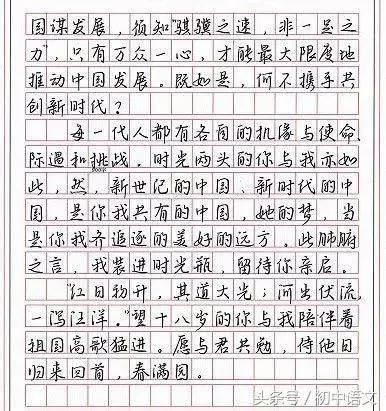

In [59]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./data/ocr.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [60]:
from langchain_core.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(
    model="gemma3:27b", 
    temperature=0,
    base_url="http://35.201.232.31:3009"
)


def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }

    content_parts = []

    text_part = {"type": "text", "text": text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(
    {"text": "請寫出作文內容", "image": image_b64}
)

print(query_chain)

好的，根據圖片，這篇作文的內容如下：

**奮鬥成長**

每個成長，獨和夢還之遠，非一星之功，只有方為一志，才能最大限度地推動中國成長。欣與喜，何不携手共創新時代？

每一代人都有各局的祖傳與使命，所遇和挑戰，時差兩大，你方我方，此一波，新世紀的中國，新時代的中國，要你我若有好的中國，她而替，若要你我希望適的更美好的遠方，此即胸之言，我裝通過時光積累，為待你尋各居。

江山和打，其道大光；河山代流，為江之洋。想十八的你方我找伴伴看祖國高歌猛進。居與君若其勉，待他切切未回首，希滿國。

希望以上內容對您有幫助！


In [62]:
messages = {"text": "請寫出作文內容", "image": image_b64}

for chunk in chain.stream(messages):
    print(chunk, end="", flush=True)

好的，根據圖片，這篇作文的內容如下：

**奮鬥成長**

每個成長，獨和夢還之遠，非一星之功，只有方為一志，才能最大限度地推動中國成長。欣與喜，何不携手共創新時代？

每一代人都有各局的祖傳與使命，所遇和挑戰，時差兩大，你方我方，此一波，新世紀的中國，新時代的中國，要你我若有好的中國，她而替，若要你我希望適的更美好的遠方，此即胸之言，我裝通過時光積累，為待你尋各居。

江山和打，其道大光；河山代流，為江之洋。想十八的你方我找伴伴看祖國高歌猛進。居與君若其勉，待他切切未回首，希滿國。

希望以上內容對您有幫助！

#### Reasoning models

In [53]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, SystemMessage

llm = ChatOllama(
    model="deepseek-r1:70b",  # 確保這是正確名稱，且已在 Ollama server 上被 pull 或 run
    base_url="http://35.201.232.31:3009"
)

messages = [
    SystemMessage(content="你是一位數學助理"),
    HumanMessage(content="What is 3^3?")
]

response = llm.invoke(messages)
print(response.content)


<think>
首先，计算3的三次方。

3乘以3等于9。

然后，将结果再乘以3，即9乘以3得到27。

因此，3的三次方等于27。
</think>

**解題步驟：**

1. **理解問題**：計算 \( 3^3 \) 的值。
2. **進行計算**：
   \[
   3^3 = 3 \times 3 \times 3
   \]
   首先，\( 3 \times 3 = 9 \)；
   接著，\( 9 \times 3 = 27 \)。
3. **得出結論**：\( 3^3 = 27 \)

**答案：**
\[
\boxed{27}
\]


In [57]:
for chunk in llm.stream(messages):
    print(chunk.content, end="", flush=True)

<think>
首先，我需要计算3的三次方。

我知道，指数运算是将底数重复相乘，次数由指数决定。因此，3³意味着将3连续乘以自身三次。

接下来，我进行具体的乘法计算：

3 × 3 = 9

然后，将得到的结果再与3相乘：

9 × 3 = 27

所以，最终的答案是27。
</think>

当然！我们来计算 \(3^3\) 的值。

**解題步驟：**

1. **理解指数運算：**
   \(3^3\) 表示將數字 3 自身相乘三次，即：
   \[
   3^3 = 3 \times 3 \times 3
   \]

2. **進行計算：**
   - 先計算前兩個 3 的乘積：
     \[
     3 \times 3 = 9
     \]
   - 再將結果與第三個 3 相乘：
     \[
     9 \times 3 = 27
     \]

**最終答案：**
\[
\boxed{27}
\]

### Chain小試牛刀
- [LangChain 怎麼玩？入門教學篇](https://myapollo.com.tw/blog/langchain-tutorial-get-started/)
- [LangChain Introduction](https://python.langchain.com/docs/introduction/)

In [19]:
import os
from dotenv import load_dotenv
import sys
import importlib

from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.chains import LLMChain
from langchain_community.callbacks import get_openai_callback

# import templates_prompt
# importlib.reload(templates_prompt)
# from templates_prompt import plan_prompt

print(sys.path)
sys.path.append("D:/workplace/project_management/Project/langchain")
load_dotenv() # Load environment variables from a .env file

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
AZURE_ENDPOINT = os.getenv("AZURE_ENDPOINT")
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_API_VERSION = os.getenv("AZURE_API_VERSION")
AZURE_DEPLOYMENT_NAME = os.getenv("AZURE_DEPLOYMENT_NAME")
OLLAMA_BASE_URL = os.getenv("OLLAMA_BASE_URL")
OLLAMA_BASE_URL_LOCAL = os.getenv("OLLAMA_BASE_URL_LOCAL")
TEXT_GENERATION_MODEL_CLOUD = os.getenv("TEXT_GENERATION_MODEL_CLOUD")
TEXT_GENERATION_MODEL_LOCAL = os.getenv("TEXT_GENERATION_MODEL_LOCAL")

class MyOutputParser(StrOutputParser):
    def parse(self, text):
        return text.replace('Assistant:', '')

['d:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\python310.zip', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\DLLs', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\lib', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310', '', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\lib\\site-packages', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\lib\\site-packages\\win32', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\lib\\site-packages\\win32\\lib', 'd:\\Program\\Miniforge3\\envs\\homeeai_xplorer_chat_python310\\lib\\site-packages\\Pythonwin', 'D:/workplace/project_management/Project/langchain', 'D:/workplace/project_management/Project/langchain', 'D:/workplace/project_management/Project/langchain']


In [20]:
!ollama list

NAME                                              ID              SIZE      MODIFIED    
llava:7b                                          8dd30f6b0cb1    4.7 GB    3 weeks ago    
hf.co/benxh/Qwen2.5-VL-7B-Instruct-GGUF:latest    dccd480cacac    4.7 GB    4 weeks ago    
llama3.2:3b                                       a80c4f17acd5    2.0 GB    5 weeks ago    
llama3.2:1b                                       baf6a787fdff    1.3 GB    6 weeks ago    


In [22]:
# llm = ChatOpenAI(
#     openai_api_key=OPENAI_API_KEY,
#     model=TEXT_GENERATION_MODEL_CLOUD, 
#     temperature=0.7
# )

# llm = AzureChatOpenAI(
#     azure_endpoint=AZURE_ENDPOINT, 
#     api_version=AZURE_API_VERSION,
#     deployment_name=AZURE_DEPLOYMENT_NAME, 
#     model=TEXT_GENERATION_MODEL_CLOUD,
#     temperature=0.5
# )

llm = ChatOllama(
    base_url="http://35.194.200.142:3009",
    model="mistral:7b",#TEXT_GENERATION_MODEL_LOCAL,
    temperature=0.8
)

python_prompt = ChatPromptTemplate.from_messages([
    ("system", "你是資深 Python 工程師"),
    ("user", "請幫我寫出 1 個 Python {topic}範例")
])

output_parser = MyOutputParser()

#### method1: LLMChain
- 顯式的鏈式處理工具
- 可以通過參數設置如 verbose=True 來啟用詳細日誌，便於調試

In [23]:
chain = LLMChain(llm=llm, prompt=python_prompt, output_parser=output_parser , verbose=True)
result = chain.run({"topic": "Python Hello World"})
print(result)
with get_openai_callback() as cb:
    result = chain.run({"topic": "Python Hello World"})
    print(result)
    print(
        f"Total Cost (USD): ${format(cb.total_cost, '.6f')}"
    )  # without specifying the model version, flat-rate 0.002 USD per 1k input and output tokens is used



> Entering new LLMChain chain...
Prompt after formatting:
System: 你是資深 Python 工程師
Human: 請幫我寫出 1 個 Python Python Hello World範例

> Finished chain.
當然！以下是一個簡單的 "Hello, World!" 程式碼，使用 Python3 語法：

```python
def main():
    print("Hello, World!")

if __name__ == "__main__":
    main()
```

在這段程式碼中，我們定義了一個函數 `main`，它將"Hello, World!" 字串印出到控制台上。接下來，使用 `if __name__ == "__main__"` 的條件判斷，只有當這個程式碼被直接執行（不是匯入作為模組）時，才會執行 `main` 函數。

您可以使用下面的指令來執行此 Python 程式碼：

```sh
python3 script.py
```

其中 `script.py` 是你儲存了上述代碼的 Python 檔案名稱。


> Entering new LLMChain chain...
Prompt after formatting:
System: 你是資深 Python 工程師
Human: 請幫我寫出 1 個 Python Python Hello World範例

> Finished chain.
當然！以下是一個使用 Python3 撰寫的 "Hello, World!" 程式碼，可以在控制台中顯示文字 "Hello, World!"。

```python
def main():
    print("Hello, World!")

if __name__ == "__main__":
    main()
```

在這個範例中，函數 `main()` 定義了一個打印 "Hello, World!" 的程式碼，接下來我們使用 `if __name__ == "__main__":` 語句確保當檔案本身被執行時（不是被 imports 或導入為其他模組），函數 `main()` 就會執行。

此外，請注意，如果您使用的是 Python2.x 

#### method2: | 操作符
- 語法簡單
- 快速搭建處理流，不需要顯式定義鏈

In [37]:
chains = {
    "python_chain": python_prompt | llm | output_parser,
    # "plan_script_chain": plan_prompt | llm | parse_script_plan,
    # "initial_dialogue_chain": initial_dialogue_prompt | llm | StrOutputParser(),
    # "enhance_chain": enhance_prompt | llm | StrOutputParser(),
}

# plan = chains["python_chain"].invoke(input={"topic": "Python Hello World"})
# print(plan)

with get_openai_callback() as cb:
    result = chains["python_chain"].invoke(input={"topic": "Python Hello World"})
    print(result)
    print(
        f"Total Cost (USD): ${format(cb.total_cost, '.6f')}"
    )  # without specifying the model version, flat-rate 0.002 USD per 1k input and output tokens is used

當然可以！以下是一個簡單的 Python "Hello, World!" 範例：

```python
# 這是一個簡單的 Python 程式，會在螢幕上印出 "Hello, World!"
print("Hello, World!")
```

你可以將這段程式碼儲存在一個檔案中，例如 `hello_world.py`，然後在終端機或命令提示字元中執行以下命令來執行這個程式：

```sh
python hello_world.py
```

執行後，你應該會在螢幕上看到以下輸出：

```
Hello, World!
```
Total Cost (USD): $0.002380


### Stream

| **方法** | **Ollama 支援？** | **OpenAI 支援？** | **是否逐步輸出？** |
|-----------|------------|------------|------------------|
| `.stream()` | ✅ **支援** | ✅ **支援** | ✔ **逐步輸出** |
| `streaming=True` | ❌ **不支援** | ✅ **支援** | ✔ **逐步輸出** |
| `.invoke()` | ✅ **支援** | ✅ **支援** | ✖ **一次性回傳** |m

#### method1: llm.stream

In [ ]:
llm = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    model=TEXT_GENERATION_MODEL_CLOUD, 
    temperature=0.7,
    streaming=True
)

# ✅ 使用 .stream() 來獲取 Streaming Token
print("🔹 Streaming output:")
for chunk in llm.stream("請幫我寫出 1 個 Python Hello World 範例"):
    print(chunk.content, end="", flush=True)  # 🔹 Streaming Token 會即時輸出


In [ ]:
llm = ChatOllama(
    base_url=OLLAMA_BASE_URL_LOCAL,
    model="llama3.2:1b",#TEXT_GENERATION_MODEL_LOCAL,
    temperature=0.8,
    streaming=True
)

# ✅ 使用 .stream() 來獲取 Streaming Token
print("🔹 Streaming output:")
for chunk in llm.stream("請幫我寫出 1 個 Python Hello World 範例"):
    print(chunk.content, end="", flush=True)  # 🔹 Streaming Token 會即時輸出


#### method2: streaming_stdout

In [ ]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

llm = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    model=TEXT_GENERATION_MODEL_CLOUD, 
    temperature=0.7,
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()]  # 🔹 讓 Token 逐步輸出
)

chain = LLMChain(llm=llm, prompt=python_prompt)

# ✅ Streaming 逐步輸出
result = chain.invoke({"topic": "Python Hello World"})
print("\nFinal result:", result)


In [ ]:
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

llm = ChatOllama(
    base_url=OLLAMA_BASE_URL_LOCAL,
    model="llama3.2:1b",#TEXT_GENERATION_MODEL_LOCAL,
    temperature=0.8,
    streaming=True,
    callbacks=[StreamingStdOutCallbackHandler()]  # 🔹 讓 Token 逐步輸出
)

chain = LLMChain(llm=llm, prompt=python_prompt)

# ✅ Streaming 逐步輸出
result = chain.invoke({"topic": "Python Hello World"})
print("\nFinal result:", result)


## Token

In [1]:
import tiktoken
import os
from dotenv import load_dotenv

# 從 .env 文件加載 API 密鑰
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# 初始化編碼器
encoding = tiktoken.encoding_for_model("gpt-3.5-turbo")

# 範例文字
text = "tiktoken 是一個由 OpenAI 開發的快速 BPE 分詞器。"

# 編碼文字
encoded_text = encoding.encode(text)
print(f"Encoded text: {encoded_text}")

# 解碼 tokens
decoded_text = encoding.decode(encoded_text)
print(f"Decoded text: {decoded_text}")

# 計算 token 數量
num_tokens = len(encoded_text)
print(f"Number of tokens: {num_tokens}")

# 列出每個 token 對應的文字
token_list = []
for i, token in enumerate(encoded_text):
    decoded_token = encoding.decode([token])
    token_list.append(f"{i+1}: {token} - {decoded_token}")

print("\nToken list:")
for token_info in token_list:
    print(token_info)

Encoded text: [83, 1609, 5963, 55951, 15120, 20022, 233, 68171, 5377, 15836, 18630, 244, 233, 23706, 120, 9554, 26203, 104, 95399, 426, 1777, 59757, 50520, 252, 32648, 1811]
Decoded text: tiktoken 是一個由 OpenAI 開發的快速 BPE 分詞器。
Number of tokens: 26

Token list:
1: 83 - t
2: 1609 - ik
3: 5963 - token
4: 55951 -  是
5: 15120 - 一
6: 20022 - �
7: 233 - �
8: 68171 - 由
9: 5377 -  Open
10: 15836 - AI
11: 18630 -  �
12: 244 - �
13: 233 - �
14: 23706 - �
15: 120 - �
16: 9554 - 的
17: 26203 - �
18: 104 - �
19: 95399 - 速
20: 426 -  B
21: 1777 - PE
22: 59757 -  分
23: 50520 - �
24: 252 - �
25: 32648 - 器
26: 1811 - 。


### RAG
- reference
    - [InMemoryVectorStore](https://python.langchain.com/api_reference/core/vectorstores/langchain_core.vectorstores.in_memory.InMemoryVectorStore.html)
    - [OllamaEmbeddings](https://python.langchain.com/docs/integrations/text_embedding/ollama/)
    - [AzureOpenAIEmbeddings](https://python.langchain.com/docs/integrations/text_embedding/azureopenai/)

#### Instantiation

In [ ]:
AZURE_ENDPOINT = os.getenv("AZURE_ENDPOINT")
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_API_VERSION = os.getenv("AZURE_API_VERSION")
AZURE_DEPLOYMENT_NAME = os.getenv("AZURE_DEPLOYMENT_NAME")

In [ ]:
from langchain_openai import AzureOpenAIEmbeddings
from langchain_ollama import OllamaEmbeddings


embeddings = AzureOpenAIEmbeddings(
    model="med_law_embedder", # 部署的名稱
    # dimensions: Optional[int] = None, # Can specify dimensions with new text-embedding-3 models
    azure_endpoint=AZURE_ENDPOINT, # If not provided, will read env variable AZURE_OPENAI_ENDPOINT
    api_key=AZURE_OPENAI_API_KEY, # Can provide an API key directly. If missing read env variable AZURE_OPENAI_API_KEY
    openai_api_version=AZURE_API_VERSION, # If not provided, will read env variable AZURE_OPENAI_API_VERSION
)

embeddings = OllamaEmbeddings(
    model="llama3.2:latest", 
)

#### Indexing and Retrieval

In [33]:
from langchain_core.vectorstores import InMemoryVectorStore

documents = [
  "Llamas are members of the camelid family meaning they're pretty closely related to vicuñas and camels",
  "Llamas were first domesticated and used as pack animals 4,000 to 5,000 years ago in the Peruvian highlands",
  "Llamas can grow as much as 6 feet tall though the average llama between 5 feet 6 inches and 5 feet 9 inches tall",
  "Llamas weigh between 280 and 450 pounds and can carry 25 to 30 percent of their body weight",
  "Llamas are vegetarians and have very efficient digestive systems",
  "Llamas live to be about 20 years old, though some only live for 15 years and others live to be 30 years old",
]

vectorstore = InMemoryVectorStore.from_texts(
    documents,
    embedding=embeddings,
)

# Use the vectorstore as a retriever
retriever = vectorstore.as_retriever()

In [34]:
# Retrieve the most similar text
retrieved_documents = retriever.invoke("What animals are llamas related to?")

# show the retrieved document's content
retrieved_documents[0].page_content

"Llamas are members of the camelid family meaning they're pretty closely related to vicuñas and camels"

#### Step 1: Generate embeddings

In [12]:
import ollama
import chromadb

documents = [
  "Llamas are members of the camelid family meaning they're pretty closely related to vicuñas and camels",
  "Llamas were first domesticated and used as pack animals 4,000 to 5,000 years ago in the Peruvian highlands",
  "Llamas can grow as much as 6 feet tall though the average llama between 5 feet 6 inches and 5 feet 9 inches tall",
  "Llamas weigh between 280 and 450 pounds and can carry 25 to 30 percent of their body weight",
  "Llamas are vegetarians and have very efficient digestive systems",
  "Llamas live to be about 20 years old, though some only live for 15 years and others live to be 30 years old",
]

client = chromadb.Client()
# collection = client.create_collection(name="docs")
# 檢查集合是否存在
collection_names = [col.name for col in client.list_collections()]
if "docs" in collection_names:
    collection = client.get_collection(name="docs")
else:
    collection = client.create_collection(name="docs")


# store each document in a vector embedding database
for i, d in enumerate(documents):
  response = ollama.embeddings(model="mxbai-embed-large", prompt=d)
  embedding = response["embedding"]
  collection.add(
    ids=[str(i)],
    embeddings=[embedding],
    documents=[d]
  )

Add of existing embedding ID: 0
Insert of existing embedding ID: 0
Add of existing embedding ID: 1
Insert of existing embedding ID: 1
Add of existing embedding ID: 2
Insert of existing embedding ID: 2
Add of existing embedding ID: 3
Insert of existing embedding ID: 3
Add of existing embedding ID: 4
Insert of existing embedding ID: 4
Add of existing embedding ID: 5
Insert of existing embedding ID: 5


#### Step 2: Retrieve

In [13]:
# an example prompt
prompt = "What animals are llamas related to?"

# generate an embedding for the prompt and retrieve the most relevant doc
response = ollama.embeddings(
  prompt=prompt,
  model="mxbai-embed-large" # mxbai-embed-large
)
results = collection.query(
  query_embeddings=[response["embedding"]],
  n_results=1
)
data = results['documents'][0][0]

In [7]:
data

"Llamas are members of the camelid family meaning they're pretty closely related to vicuñas and camels"

#### Step 3: Generate

In [9]:
# generate a response combining the prompt and data we retrieved in step 2
output = ollama.generate(
  model="llama3.2:latest",
  prompt=f"Using this data: {data}. Respond to this prompt: {prompt}"
)

print(output['response'])

Llamas are closely related to the following animals:

1. Vicuña: They share a common ancestry and are often considered to be the closest living relatives of the llama.
2. Camels (specifically, Bactrian camels): As members of the camelid family, llamas are also closely related to camels.

These three species - llamas, vicuñas, and camels - share a common evolutionary history and are part of the same biological family (Camelidae).


In [1]:
import ollama

# Initialize the Ollama client
ollama_client = ollama.Client()

# Define the path to your image
image_path = './image/test2.jpg'

# Prepare the message to send to the LLaVA model
message = {
    'role': 'user',
    'content': 'Describe this IC sequence image in chinese-zh:',
    'images': [image_path]
}

# Use the ollama.chat function to send the image and retrieve the description
response = ollama_client.chat(
    model="llava:7b",  # Specify the desired LLaVA model size
    messages=[message]
)

# Print the model's description of the image
print(response['message'])

role='assistant' content=' 这张图片显示了一张摆放在一个矩形框架中，表现出来的是一系列的圆圈和线条。每个圆圈都有一些数字和符号，而每个圆圈之间都有一条线条，这些线条的起点和终点都与两个圆圈相连接。在框架周围，还包括了其他元素，如一个箭头、一个字符串和一些标注，这些标注中显示了文本"开始"和"结束"，以及一些数字和符号。\n\n从左到右，第一个圆圈包含了一个箭头，其次是一个字符串，然后是三个圆圈相连接，最后一个圆圈包含了一个数字和符号。在整个图像中，每个圆圈都有一些数字和符号，而这些数字和符号的具体含义并没有明显的表达。\n\n由于您提供的是图片，所以我不能为您解释图片中所示的具体内容或详细解释图像中的每个元素，因为这需要对应的文本和数字进行准确的解释。如果您有关于图片中摆、圆圈或线条的任何问题或需要更多的帮助，请提供一些具体的细节或背景知识。 ' images=None tool_calls=None


In [ ]:
import os
from dotenv import load_dotenv
import sys
import importlib
# from tqdm import tqdm
from tqdm.notebook import tqdm
import re
from typing import Dict

from langchain_openai import ChatOpenAI, AzureChatOpenAI
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain.chains import LLMChain
from langchain_community.callbacks import get_openai_callback

print(sys.path)
sys.path.append("./")
load_dotenv() # Load environment variables from a .env file

# OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
AZURE_ENDPOINT = os.getenv("AZURE_ENDPOINT")
AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_API_VERSION = os.getenv("AZURE_API_VERSION")
AZURE_DEPLOYMENT_NAME = os.getenv("AZURE_DEPLOYMENT_NAME")
OLLAMA_BASE_URL = os.getenv("OLLAMA_BASE_URL")
TEXT_GENERATION_MODEL_CLOUD = os.getenv("TEXT_GENERATION_MODEL_CLOUD")
TEXT_GENERATION_MODEL_LOCAL = os.getenv("TEXT_GENERATION_MODEL_LOCAL")

class MyOutputParser(StrOutputParser):
    def parse(self, text):
        return text.replace('Assistant:', '')

# llm = AzureChatOpenAI(
#     azure_endpoint=AZURE_ENDPOINT, 
#     api_version=AZURE_API_VERSION,
#     deployment_name=AZURE_DEPLOYMENT_NAME, 
#     temperature=0.5
# )

llm = ChatOllama(
    base_url=os.environ["OLLAMA_BASE_URL"],
    model="llama3.1:latest", #TEXT_GENERATION_MODEL_LOCAL,
    temperature=0.8
)


python_prompt = ChatPromptTemplate.from_messages([
    ("system", "你是資深 Python 工程師"),
    ("user", "請幫我寫出 1 個 Python {topic}範例")
])



output_parser = MyOutputParser()

chain = LLMChain(llm=llm, prompt=python_prompt, output_parser=output_parser , verbose=True)
result = chain.invoke({"topic": "Python Hello World"})
print(result)
# with get_openai_callback() as cb:
#     result = chain.invoke({"topic": "Python Hello World"})
#     print(result)
#     print(
#         f"Total Cost (USD): ${format(cb.total_cost, '.6f')}"
#     )  # without specifying the model version, flat-rate 0.002 USD per 1k input and output tokens is used

['d:\\Program\\miniforge3\\python310.zip', 'd:\\Program\\miniforge3\\DLLs', 'd:\\Program\\miniforge3\\lib', 'd:\\Program\\miniforge3', '', 'd:\\Program\\miniforge3\\lib\\site-packages', 'd:\\Program\\miniforge3\\lib\\site-packages\\phidata-2.5.28-py3.10.egg', 'd:\\Program\\miniforge3\\lib\\site-packages\\setuptools\\_vendor', 'd:\\Program\\miniforge3\\lib\\site-packages\\win32', 'd:\\Program\\miniforge3\\lib\\site-packages\\win32\\lib', 'd:\\Program\\miniforge3\\lib\\site-packages\\Pythonwin']


C:\Users\TingChun.TC.hung\AppData\Local\Temp\ipykernel_8356\2438968902.py:57: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=python_prompt, output_parser=output_parser , verbose=True)




> Entering new LLMChain chain...
Prompt after formatting:
System: 你是資深 Python 工程師
Human: 請幫我寫出 1 個 Python Python Hello World範例


In [20]:
response.keys()

dict_keys(['model', 'created_at', 'message', 'done_reason', 'done', 'total_duration', 'load_duration', 'prompt_eval_count', 'prompt_eval_duration', 'eval_count', 'eval_duration'])

In [17]:
import ollama
print(dir(ollama))


['AsyncClient', 'ChatResponse', 'Client', 'GenerateResponse', 'Message', 'Options', 'ProgressResponse', 'RequestError', 'ResponseError', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_client', '_types', 'chat', 'copy', 'create', 'delete', 'embed', 'embeddings', 'generate', 'list', 'ps', 'pull', 'push', 'show']
